In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

- One tailed t_test

In [2]:
machine = pd.read_csv('files_for_lab/machine.txt',encoding = "utf-16", names=["new", "old"], dtype="float", sep = "\t", header=0)

In [3]:
machine

,new,old
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


<AxesSubplot:>

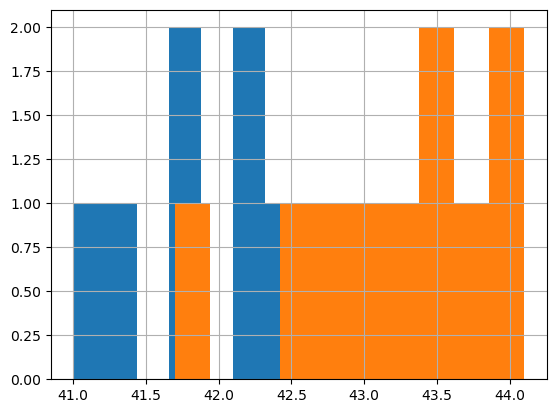

In [4]:
#check the distribution of new and old machine times
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
machine['new'].hist(ax=ax, bins=10)
machine['old'].hist(ax=ax, bins=10)

In [5]:
#H0: new machine is not faster than old machine (the times of new machine >= the times of old)
#H1: new machine is faster than old machine (times of new < times of old)

print('p value (single tailed): ',st.ttest_ind(machine['new'],machine['old'], alternative='less'))

p value (single tailed):  Ttest_indResult(statistic=-3.3972307061176026, pvalue=0.0016055712503872579)


In [6]:
# Since p value is < 0.05, then we reject H0. Thus, New machine is faster than old machine.

- Matched pairs test

In [7]:
pokemon = pd.read_csv('files_for_lab/pokemon.csv')

In [8]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [9]:
#H0: defense = attack
#H1: defense != attack
st.ttest_rel(pokemon['Defense'], pokemon['Attack'])

TtestResult(statistic=-4.325566393330478, pvalue=1.7140303479358558e-05, df=799)

In [10]:
# Since p-value is less than 0.05, then we reject H0 which means Defense is not equal to Attack.

- Inferential statistics - ANOVA

In [11]:
data = pd.read_excel('files_for_lab/anova_lab_data.xlsx',names=['power','etching_rate'],header=0)

In [12]:
data

,power,etching_rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [13]:
data.dtypes

power            object
etching_rate    float64
dtype: object

In [14]:
data.columns

Index(['power', 'etching_rate'], dtype='object')

In [15]:
data.groupby(['power']).agg({"etching_rate":np.mean})

,etching_rate
power,
160 W,5.792
180 W,6.238
200 W,8.318


In [16]:
data['power_count'] = data.groupby('power').cumcount() 

In [17]:
data_pivot = data.pivot(index='power_count', columns='power', values='etching_rate')
data_pivot.columns = ['power_'+str(x) for x in data_pivot.columns.values]
data_pivot.columns =['power_160','power_180','power_200']
data_pivot.head(10)

,power_160,power_180,power_200
power_count,,,
0,5.43,6.24,8.79
1,5.71,6.71,9.20
2,6.22,5.98,7.90
3,6.01,5.66,8.15
4,5.59,6.60,7.55


In [18]:
data_pivot.mean()

power_160    5.792
power_180    6.238
power_200    8.318
dtype: float64

In [19]:
data_pivot.columns

Index(['power_160', 'power_180', 'power_200'], dtype='object')

In [20]:
#H0: the means of Etching rate for all levels of power are the same
#H1: the means of Etching rate for all levels of power are not the same
#set a significance level = 0.05

In [21]:
st.f_oneway(data_pivot.power_160,data_pivot.power_180,data_pivot.power_200)


F_onewayResult(statistic=36.87895470100505, pvalue=7.506584272358903e-06)

In [22]:
#Since p-value is less than 0.05, then we reject H0 which means the means of etching rate are not the same.

In [23]:
#What are the degrees of freedom of model, error terms, and total DoF

In [24]:
dof = len(data)-1
dof

14